In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os 
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average, Dense
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model, Input
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from keras import metrics
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from typing import Tuple, List
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot
from keras.layers import LSTM 
%matplotlib inline

Using TensorFlow backend.


In [3]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [17]:
path = "D:\\image\\data\\"

df_path = os.path.join(path, 'complete_data.csv')
df_test_path = os.path.join(path, 'test_weather_data.csv')

df = pd.read_csv(df_path)
df = df.dropna()

df_test = pd.read_csv(df_test_path)


In [20]:


df['month'] = pd.to_datetime(df.datetime).dt.month

In [21]:
df['weekday'] = pd.to_datetime(df.datetime).dt.dayofweek

In [22]:
df['year'] = pd.to_datetime(df.datetime).dt.year

In [25]:
df.head()

,datetime,kWh,pressure,temperature,wind_speed,month,weekday,year
0,2017-01-01 0:00,0.000000,30.19,46.0,10.0,1,6,2017
1,2017-01-01 0:30,2310.732265,30.19,45.0,7.0,1,6,2017
2,2017-01-01 1:00,2289.332265,30.16,45.0,6.0,1,6,2017
3,2017-01-01 1:30,2314.583265,30.16,45.0,7.0,1,6,2017
4,2017-01-01 2:00,2309.308265,30.13,45.0,10.0,1,6,2017


In [26]:
x_train = df[['month', 'year', 'pressure', 'temperature', 'wind_speed']][:25000]
y_train = df['kWh'][:25000]

In [28]:
x_val = df[['month', 'year', 'pressure', 'temperature', 'wind_speed']][25000:30000]
y_val = df['kWh'][25000:30000]

In [29]:
x_test = df[['month', 'year', 'pressure', 'temperature', 'wind_speed']][30000:31000]
y_test = df['kWh'][30000:31000]

In [30]:
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_val = sc.fit_transform(x_val)
x_test = sc.fit_transform(x_test)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
regularization_strength = 0.001

In [56]:
def deep_learning_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(5, activation="relu", kernel_regularizer=regularizers.l2(regularization_strength), input_shape=(x_size,)))
    t_model.add(BatchNormalization())
    t_model.add(Dense(3, activation="relu", kernel_regularizer=regularizers.l2(regularization_strength)))
    t_model.add(BatchNormalization())
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(lr=1e-3, decay=0.0),
        metrics=['accuracy'])
    return(t_model)

In [57]:
model = deep_learning_model_1(x_train.shape[1], 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 35        
_________________________________________________________________
batch_normalization_11 (Batc (None, 5)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 18        
_________________________________________________________________
batch_normalization_12 (Batc (None, 3)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 4         
Total params: 89
Trainable params: 73
Non-trainable params: 16
_________________________________________________________________
None


In [58]:
epochs = 150
batch_size = 10

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

Epochs:  150
Batch size:  10


In [59]:
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1, validation_data = (x_val, y_val))

Train on 25000 samples, validate on 5000 samples
Epoch 1/150
25000/25000 [==============================] - 3s 136us/step - loss: 10089413.8016 - acc: 0.0000e+00 - val_loss: 9710841.6110 - val_acc: 0.0000e+00
Epoch 2/150
25000/25000 [==============================] - 2s 97us/step - loss: 9618480.5810 - acc: 0.0000e+00 - val_loss: 9241538.9390 - val_acc: 0.0000e+00
Epoch 3/150
25000/25000 [==============================] - 2s 98us/step - loss: 8881657.5240 - acc: 0.0000e+00 - val_loss: 8580602.7410 - val_acc: 0.0000e+00
Epoch 4/150
25000/25000 [==============================] - 2s 97us/step - loss: 7957514.3694 - acc: 0.0000e+00 - val_loss: 7570063.0615 - val_acc: 0.0000e+00
Epoch 5/150
25000/25000 [==============================] - 2s 97us/step - loss: 6892609.2920 - acc: 0.0000e+00 - val_loss: 6317574.8235 - val_acc: 0.0000e+00
Epoch 6/150
25000/25000 [==============================] - 3s 110us/step - loss: 5738253.7262 - acc: 0.0000e+00 - val_loss: 5154315.9835 - val_acc: 0.0000e+00


Epoch 104/150
25000/25000 [==============================] - 3s 106us/step - loss: 253411.0897 - acc: 0.0000e+00 - val_loss: 240409.7012 - val_acc: 0.0000e+00
Epoch 105/150
25000/25000 [==============================] - 2s 99us/step - loss: 253395.3815 - acc: 0.0000e+00 - val_loss: 238419.4634 - val_acc: 0.0000e+00
Epoch 106/150
25000/25000 [==============================] - 2s 100us/step - loss: 254187.9712 - acc: 0.0000e+00 - val_loss: 231581.1845 - val_acc: 0.0000e+00
Epoch 107/150
25000/25000 [==============================] - 2s 99us/step - loss: 252082.9709 - acc: 0.0000e+00 - val_loss: 233965.0381 - val_acc: 0.0000e+00
Epoch 108/150
25000/25000 [==============================] - 2s 100us/step - loss: 252564.8475 - acc: 0.0000e+00 - val_loss: 239313.0786 - val_acc: 0.0000e+00
Epoch 109/150
25000/25000 [==============================] - 3s 101us/step - loss: 253010.8553 - acc: 0.0000e+00 - val_loss: 243219.8959 - val_acc: 0.0000e+00
Epoch 110/150
25000/25000 [=====================

In [60]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

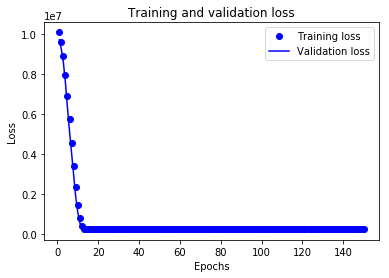

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [62]:
y_pred = model.predict(x_test[:10])
# print(y_pred)
print(y_pred + 800)
print()

[[3748.9192]
 [3897.3623]
 [3809.7932]
 [3898.016 ]
 [3808.9502]
 [3808.107 ]
 [3832.7595]
 [3958.047 ]
 [3927.515 ]
 [3927.515 ]]



In [63]:
y_test[50:100]

33101    4148.487000
33102    4161.025000
33103    4121.763000
33104    4129.237000
33105    4083.013000
33106    4029.075000
33107    3931.750000
33108    3844.301000
33109    3697.486000
33110    3612.100462
33111    3526.051462
33112    3369.875462
33113    3280.477462
33114    3195.199462
33115    3103.077462
33116    3038.325462
33117    2974.263462
33118    2934.400462
33119    2838.226462
33120    2802.737000
33121    2789.812462
33122    2797.926462
33123    2742.275000
33124    2734.436000
33125    2719.051000
33126    2738.862000
33127    2726.712000
33128    2697.190000
33129    2704.911000
33130    2715.451000
33133    3086.300000
33136    3240.038000
33137    3335.662000
33138    3483.488000
33149    4132.837000
33151    4151.051000
33152    4124.600000
33153    4074.425000
33154    3996.063000
33155    3903.987000
33156    3758.051000
33157    3684.399000
33158    3552.150000
33159    3433.063000
33160    3330.837000
33161    3239.451000
33162    3161.037000
33163    3050

In [ ]:
#keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
#IPython.display.Image('test_keras_plot_model.png')